# Assignment #3 - Neural Networks



### Anushka Tibrewal

# I. Overview

In this assignment I have used the regression dataset used in assignment 1 and have implemented NeuralNet class for regression on the same dataset. Moreover to find a good neural network parameters and report the CV accuracies I have explained and used 5-fold cross validation. Also I have given a good Summary of the nonlinear regression model. Additionally have provided the summary for non linear logistic regression model and completed the code for the same. The implementation of the code of non linear rogistic regression has been applied to my classification dataset and also on toy data set.

# II. Data

The AirQuality dataset consist of 9358 instances of AirQuality sensor devices. The data has been recorded for an year to check the air quality chemical sensor device responses. The data consist of 15 attributes which are as follows.<br>
Date (DD/MM/YYYY)<br>

Time (HH.MM.SS)<br>

True hour average concentration CO in mg/m^3 (reference analyzer)<br>

PT08.S1 (tin oxide) hour average sensor response (nominally CO targeted)<br>

True hour averag overall Non Metanic HydroCarbons concentration in mg/m^3 (reference analyzer)<br>

True hour averag Benzene concentration in mg/m^3 (reference analyzer)<br>

PT08.S2 (titania) hour average sensor response (nominally NMHC targeted)<br>

True hour average NOx concentration in ppb (reference analyzer)<br>

PT08.S3 (tungsten oxide) hour average sensor response (nominally NOx targeted)<br>

True hour average NO2 concentration in mg/m^3 (reference analyzer)<br>

PT08.S4 (tungsten oxide) hour average sensor response (nominally NO2 targeted)<br>

PT08.S5 (indium oxide) hour average sensor response (nominally O3 targeted)<br>

T Temperature in °C<br>

RH Relative Humidity<br>

AH Absolute Humidity<br>

## II. Data Visualization and Preprocessing

In [80]:
from IPython.display import Latex
from IPython.display import Math


import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly
import plotly.plotly as mypy

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [81]:
from plotly import tools


import plotly.plotly as mypy
import plotly
plotly.tools.set_credentials_file(username='black_uchiha08', api_key='tA6Q1kyjqYi4Tqlrm9RC')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [82]:
init_notebook_mode(connected=True) 

In [83]:
df=pd.read_excel('AirQualityUCI.xlsx')

In [84]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB


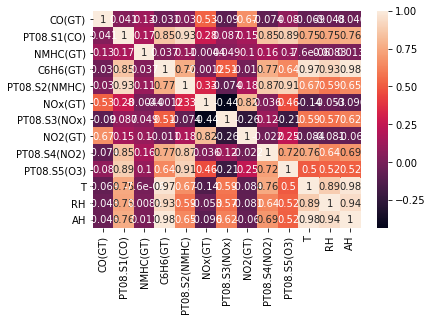

In [86]:
sns.heatmap(df.corr(), annot = True)

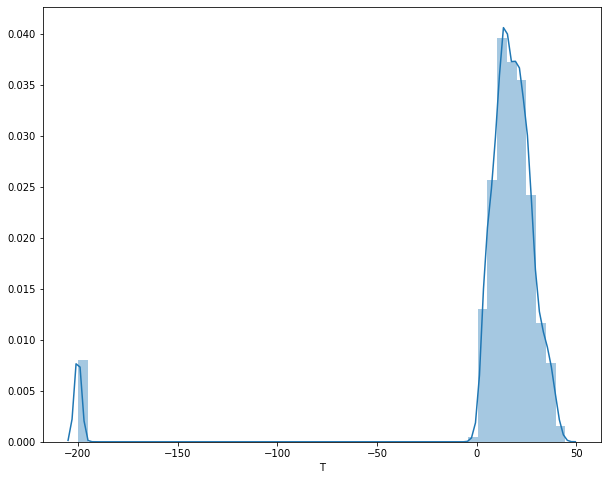

In [87]:
plt.figure(figsize = (10,8))
sns.distplot(df['T'])

From the above plot it is clear that the temperature has value -200 that is too huge and would show that the pollution content in the air is too high, so we will assign value 0 to -200.

In [88]:
df = df.drop('Date', axis=1)
df = df.drop('Time', axis=1)
df = df.drop('C6H6(GT)', axis=1)

In [89]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [90]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [91]:
df[df < 0] = 0

In [92]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.000000,150,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000,48.875001,0.757754
1,2.0,1292.250000,112,954.750000,103.0,1173.750000,92.0,1558.750000,972.250000,13.300000,47.700000,0.725487
2,2.2,1402.000000,88,939.250000,131.0,1140.000000,114.0,1554.500000,1074.000000,11.900000,53.975000,0.750239
3,2.2,1375.500000,80,948.250000,172.0,1092.000000,122.0,1583.750000,1203.250000,11.000000,60.000000,0.786713
4,1.6,1272.250000,51,835.500000,131.0,1205.000000,116.0,1490.000000,1110.000000,11.150000,59.575001,0.788794
5,1.2,1197.000000,38,750.250000,89.0,1336.500000,96.0,1393.000000,949.250000,11.175000,59.175000,0.784772
6,1.2,1185.000000,31,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000,56.775000,0.760312
7,1.0,1136.250000,31,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000,60.000000,0.770238
8,0.9,1094.000000,24,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000,59.674999,0.764819
9,0.6,1009.750000,19,560.750000,0.0,1705.000000,0.0,1234.750000,501.250000,10.250000,60.200001,0.751657


In [93]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.765545,1056.692672,21.373731,902.298983,203.636796,802.695353,93.232617,1399.186287,982.774554,17.600720,47.306631,0.985416
std,1.554264,301.232260,91.103489,318.681183,214.984126,299.341439,61.468588,441.442059,438.060087,9.356178,19.473998,0.442966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,921.000000,0.000000,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,0.000000,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,0.000000,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [94]:
for i in df.loc[df['CO(GT)']==0].index:
    df.loc[i, 'CO(GT)'] = df['CO(GT)'].mean()
for i in df.loc[df['PT08.S1(CO)']==0].index:
    df.loc[i, 'PT08.S1(CO)'] = df['PT08.S1(CO)'].mean()
for i in df.loc[df['NMHC(GT)']==0].index:
    df.loc[i, 'NMHC(GT)'] = df['NMHC(GT)'].mean()
for i in df.loc[df['PT08.S2(NMHC)']==0].index:
    df.loc[i, 'PT08.S2(NMHC)'] = df['PT08.S2(NMHC)'].mean()
for i in df.loc[df['NOx(GT)']==0].index:
    df.loc[i, 'NOx(GT)'] = df['NOx(GT)'].mean()
for i in df.loc[df['PT08.S3(NOx)']==0].index:
    df.loc[i, 'PT08.S3(NOx)'] = df['PT08.S3(NOx)'].mean()
for i in df.loc[df['NO2(GT)']==0].index:
    df.loc[i, 'NO2(GT)'] = df['NO2(GT)'].mean()
for i in df.loc[df['PT08.S4(NO2)']==0].index:
    df.loc[i, 'PT08.S4(NO2)'] = df['PT08.S4(NO2)'].mean()
for i in df.loc[df['PT08.S5(O3)']==0].index:
    df.loc[i, 'PT08.S5(O3)'] = df['PT08.S5(O3)'].mean()
for i in df.loc[df['T']==0].index:
    df.loc[i, 'T'] = df['T'].mean()
for i in df.loc[df['RH']==0].index:
    df.loc[i, 'RH'] = df['RH'].mean()
for i in df.loc[df['AH']==0].index:
    df.loc[i, 'AH'] = df['AH'].mean()

In [95]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.600000,1360.000000,150.000000,1045.500000,166.000000,1056.250000,113.000000,1692.000000,1267.500000,13.600000,48.875001,0.757754
1,2.000000,1292.250000,112.000000,954.750000,103.000000,1173.750000,92.000000,1558.750000,972.250000,13.300000,47.700000,0.725487
2,2.200000,1402.000000,88.000000,939.250000,131.000000,1140.000000,114.000000,1554.500000,1074.000000,11.900000,53.975000,0.750239
3,2.200000,1375.500000,80.000000,948.250000,172.000000,1092.000000,122.000000,1583.750000,1203.250000,11.000000,60.000000,0.786713
4,1.600000,1272.250000,51.000000,835.500000,131.000000,1205.000000,116.000000,1490.000000,1110.000000,11.150000,59.575001,0.788794
5,1.200000,1197.000000,38.000000,750.250000,89.000000,1336.500000,96.000000,1393.000000,949.250000,11.175000,59.175000,0.784772
6,1.200000,1185.000000,31.000000,689.500000,62.000000,1461.750000,77.000000,1332.750000,732.500000,11.325000,56.775000,0.760312
7,1.000000,1136.250000,31.000000,672.000000,62.000000,1453.250000,76.000000,1332.750000,729.500000,10.675000,60.000000,0.770238
8,0.900000,1094.000000,24.000000,608.500000,45.000000,1579.000000,60.000000,1276.000000,619.500000,10.650000,59.674999,0.764819
9,0.600000,1009.750000,19.000000,560.750000,203.636796,1705.000000,93.232617,1234.750000,501.250000,10.250000,60.200001,0.751657


In [96]:
target = pd.DataFrame(df.iloc[:,9])

## Reading and analyzing the plots

The dataset consist of total 15 columns, amongst which 12 columns are of significant importance, so while analyzing the dataset it can be observed that the columns date and time can be removed because it does not create any significant impacts. Moreover after visualizing the dataset we can also observe that the column C6H6(GT) can also be removed because C6H6(GT) have no sensor measure result, and hence it is not relevant with another attributes that have actual sensor measures, hence this column can also be dropped off and we are intotal left with 12 columns for the dataset. Moreover the missing values in the dataset is represented by '-200', we can also fill this missing value with either mean or median.
Moreover from the plots above we can see that the temperature has value -200 that is too huge and would show that the pollution content in the air is too high, so we will assign value 0 to -200.

## Summary of Cross Validation and correctness of implementation.

Cross Validation is a method in which we reserve a particular sample of a dataset on which we do not train the model. But later, we test our model on this sample before finalizing it.<br>

The steps involved in cross validation are:<br>

We reserve a sample data set<br>
Train the model using the remaining part of the dataset.<br>
Use the reserve sample of the test (validation) set. This will help in gauging the effectiveness of the model’s performance. If the model delivers a positive result on validation data, go ahead with the current model.<br>

The model should be trained on large datasets. Else we will fail to read and recognise the underlying trend in the data, which would eventually result in higher bias.We also need a good ratio of testing data points. As we know, less amount of data points can lead to a variance error while testing the effectiveness of the model
We should iterate on the training and testing process multiple times. We should change the train and test dataset distribution. This helps in validating the model effectiveness properly.<br>

In Cross validation we divide the training data into approximatelt equal size into several parts (K parts). And each part in turn is selected as the testing data. Fit the model with parameter lambda for each k = 1,2,...K, to the other K − 1 parts, and then compute the error in predicting the kth part. Repeat this for many values of lambda and choose the value of lambda that makes CV(lambda) as the smallest. Typically, we use 5 or 10 fold. In this assignment, I've used 5 fold cross validation

## Summary of nonlinear regression.

Neural networks also known as artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions, we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation.
Nonlinear regression is a type of regression where we fit the data to the model. In Simple linear regression we feed two variable and it gives us back a straight line of the form y = mx +c, but in non linear regression it generates a curve. We can say that making the sum of squares as small as possible is the main objective of the model. How the observation vary from the mean of the dataset is checked by the sum of the squares. The smaller the sum of these squared figures, the better the function fits the data points in the set.

## Neural Network

In [97]:
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [98]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # parameters for training
        _lambda = params.pop('Lambda', 0.)

        
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

# Explanation of codes

In the above codes we have presented two different types of class. One is <b> Standardizer class </b>  and the other is <b> NeuralNet class </b>. The Standardizer class is used to normalizes the values. In the NeuralNet class we have we build the neural network such that it learns the data through feed forward and back propagataion. Fitting the data with MLP is a combinatorial optimization problem with non-smooth step function. So, we can consider smooth step function, a s-shaped sigmoid function. We call this smooth function as activation function. The __init__ is the constructor of the class. In the nunits we have the number of inputs, hidden units, and outputs. In the set_hunit function we give the weight as parameter and it is used to update or intiate the wwights. The Implementation of pack function is that it packs the multiple weights of each layer into one single vector. The unpack function unpacks the single vector into multiple weights of each layer(basically it does the vice versa of what pack function does). 

Forward pass in neural network propagates as shown below: <br> <br>

$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W 
\end{align}
$$

Where h is the activation function. Activation function is used to make the network nonlinear. <br> <br>

In the backward pass the function takes the input as the z values, Target values and the error. The weights and the bias are updated based on the delta values. The weight vector of that particular layer is packed by this method and then it returns it. The functions that are excecuted during backward pass are shown below. <br> <br>

$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$

The features and target serves as the input for the train function. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda. <br> <br>

The optimtarget functionby uses the object function and updates the weights and tries to reduce the error. <br> <br>

The use function is applied after training the model to the test data . Testing data is passed as parameter and it stadardizes the data. Then forward is applied on the data which returns the predictions. <br> <br>

_nLayers - hidden unit layers. <br> <br>
rho - the learning rate attribute of the class. <br> <br>
_W - weights. <br> <br>
_weights - weights as _W written in one dimension. <br> <br>
stdX - standardization class for the data. <br> <br>
stdT - standardization class for the target. <br>

In [99]:
from sklearn.metrics import mean_squared_error

# Cross Validation

In [100]:
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    
    X_partitioned = split(X)
    T_partitioned = split(T)
    
 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 

        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
           
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
          
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

# Explanation of codes 

In the above code we have used split function which is used to divide the data into different partts. So, the split function will split parts of 20% of whole data, myList will give five 20% of 100% of data. We iterate through the length of s (data) and keep on appending to myList so we will have 5 parts now and we will return the list. 


The cross_validate function takes the input parameters as X, T and parameters as input, where X contains the sample, T that contains the target values of the samples. This final_list and best_paramlist is returned by this function. The data divided by the split function is stored into X_partitioned and T_partitioned of this function which are in the form of lists. Each element of these lists are 20% of the original data size. 


In the cross_validate function there is a for loop that iterates through all the 5 parts and i is the test data's index of X_partitioned and T_parititoned lists. The training set uses the remaining data. Now inside for loop using X_paritioned[i], T_partitioned[i] we declare X_test and Y_test.

There is a second for loop that uses k which is the validation part of the 5 parts. Except k and i the rest data is used for our training set. Inside the for loop we declare X_val, y_val using X_partitioned[k] and  T_partitioned[k] which uses another 20% of our data.

We are training data with our different parameters passed and evaluating on validation data in each validation loop . The rmse value returned by each parameter is appended to rmselist, parameters respective to that rmse are appended into paramlist to keep track of indices. Now after each validation we are selecting the parameter that produced minimum rmse value and storing the results into history_rmse and params list.

We pick one best result from history_rmse list. Now the model is applied to test set after retraining the model with the best parameter param in parameters. The parameters are appended to best_paramlist and the test accuracy is appended to final_list. This operation runs for 5 folds and cross validate function returns final_list and best_paramlist which are best Accuracies of each test and best Params of each test. 

# Presentation of CV result

In [101]:
models = [[12,3,1],[12,5,1],[12,7,1], [12,10,1], [12,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(df), np.array(target), models)

Test number:  0
K is :  0
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.6465439763067233, 0.5462083383016504, 0.4096902910974955, 0.45152625761074855, 0.3878274813509021]
0.3878274813509021
[12, 12, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.26321800219934316, 0.34757155091872394, 0.39264312190458744, 0.30060633781670826, 0.23072588900448002]
0.23072588900448002
[12, 12, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.2755409913071327, 0.24834337631243794, 0.2606010217240705, 0.14710125918079744, 0.1513355232533366]
0.14710125918079744
[12, 10, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.2064523956349034, 0.18620469272444087, 0.24723286737580075, 0.40170646763022483, 0.3473128770323408]
0.18620469272444087
[12, 5, 1]
[[12, 12, 1], [12, 12, 1], [12, 10, 1], [12, 5, 1]]
[0.3878274813509021, 0.23072588900448002, 0.14710125918079744, 0.18620469272444087]
[12, 7, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Test number:  1
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.03273492590164209, 0.019696501238570415, 0.019137987588864553, 0.015871714630086638, 0.008983854054037944]
0.008983854054037944
[12, 12, 1]
K is :  1
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.1908448330504895, 0.3435376682472564, 0.38584628002592686, 0.2086755893700666, 0.3401708725224323]
0.1908448330504895
[12, 3, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.18825342437705794, 0.0759426334246537, 0.19805175307236025, 0.1881879978000795, 0.21482219866105748]
0.0759426334246537
[12, 5, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.255333795768626, 0.3006387037224283, 0.47100188785885, 0.38797292238813774, 0.35328191571269324]
0.255333795768626
[12, 3, 1]
[[12, 12, 1], [12, 3, 1], [12, 5, 1], [12, 3, 1]]
[0.008983854054037944, 0.1908448330504895, 0.0759426334246537, 0.255333795768626]
[12, 3, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Test number:  2
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.011965844775895062, 0.013658535142106366, 0.01923287852173947, 0.014462150985312516, 0.017170114261131353]
0.011965844775895062
[12, 3, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.5202151829678837, 0.4692531444391688, 0.5990402526052396, 0.478421593539703, 0.35927499565867305]
0.35927499565867305
[12, 12, 1]
K is :  2
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.07633926553100588, 0.14138774472750837, 0.28483755024256535, 0.16659693680763124, 0.1700429487261123]
0.07633926553100588
[12, 3, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.2314351613391155, 0.24449705597522092, 0.36614114421966065, 0.44547405588851885, 0.391770479881789]
0.2314351613391155
[12, 3, 1]
[[12, 3, 1], [12, 12, 1], [12, 3, 1], [12, 3, 1]]
[0.011965844775895062, 0.35927499565867305, 0.07633926553100588, 0.2314351613391155]
[12, 3, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Test number:  3
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.029718373902727368, 0.017543507469584933, 0.017022367297276107, 0.014748440729974856, 0.010388963635471331]
0.010388963635471331
[12, 12, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.7291289153313422, 0.3726203783973821, 0.5182373979312926, 0.5367942157758949, 0.49424817869187654]
0.3726203783973821
[12, 5, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.24446188387580045, 0.2155954553626441, 0.14935323612471293, 0.3616208381278105, 0.30863142837103835]
0.14935323612471293
[12, 7, 1]
K is :  3
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.27909353577762536, 0.21313605470559355, 0.3526811929352997, 0.3864061824280392, 0.33269348958205297]
0.21313605470559355
[12, 5, 1]
[[12, 12, 1], [12, 5, 1], [12, 7, 1], [12, 5, 1]]
[0.010388963635471331, 0.3726203783973821, 0.14935323612471293, 0.21313605470559355]
[12, 3, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Test number:  4
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.01132057640793394, 0.00946034304290555, 0.020149773788755883, 0.010637543916691602, 0.014787971997019795]
0.00946034304290555
[12, 5, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.5244205517871208, 0.4330686687100379, 0.4882646085557095, 0.40918314676984135, 0.33796996866030826]
0.33796996866030826
[12, 12, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.24307143277795354, 0.32233949094995334, 0.29623577701097126, 0.3260684053233682, 0.16294059633935948]
0.16294059633935948
[12, 12, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.10955203369079938, 0.1724017658708564, 0.18964847229717338, 0.17881555489069342, 0.15632287157374106]
0.10955203369079938
[12, 3, 1]
K is :  4
[[12, 5, 1], [12, 12, 1], [12, 12, 1], [12, 3, 1]]
[0.00946034304290555, 0.33796996866030826, 0.16294059633935948, 0.10955203369079938]
[12, 3, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



In [102]:
target.shape

(9357, 1)

In [103]:
df.shape

(9357, 12)

In [104]:
from sklearn import model_selection

In [105]:
print(bestAccuracy,bestParam)

[6.087066346655691, 0.5896113829184441, 0.4041646738930874, 0.36536498847223997, 0.24191372287050095] [[12, 7, 1], [12, 3, 1], [12, 3, 1], [12, 3, 1], [12, 3, 1]]


In [106]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(df),np.array(target),test_size=0.20,random_state=42)

In [107]:
model=NeuralNet([12,3,1])  
model.train(X_train,y_train,niter=1000)

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



{'w': array([ 2.57702104e-01, -4.39640982e-01,  4.95973058e-01,  1.09473585e-02,
         8.54947888e-03,  2.55766121e-03,  1.78332746e-02,  1.65394595e-02,
         2.41468637e-03,  6.14724994e-03,  1.51217905e-03,  4.98569468e-03,
         3.91750310e-04,  6.64156825e-03, -7.18107834e-03, -3.58942779e-03,
        -1.00013537e-02,  6.26246003e-03, -3.13360477e-02, -2.39307677e-02,
        -8.03559276e-03,  6.20569753e-03,  9.09057119e-03, -2.64608340e-03,
        -4.84443296e-02, -5.14442372e-02,  2.54610822e-03, -8.52445737e-03,
        -5.33968314e-03, -4.08396130e-03, -2.01100188e-01,  2.15521064e-01,
         2.18402770e-01, -4.35615213e-02,  1.54503251e-02, -2.95694533e-02,
         1.81466040e-02,  7.06624676e-03, -2.04477188e-02,  3.38995375e-01,
        -1.83215709e+00,  2.09152206e+00,  2.14898846e+00]),
 'f': 3.0390983739532334e-05,
 'reason': 'reached limit of nIterations',
 'wtrace': None,
 'ftrace': None}

In [108]:
y_pred=model.use(X_test)

In [109]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 0.06465541361745361
R squared value: 0.9999451551268042


# Plots for result.

Text(0, 0.5, 'Residuals')

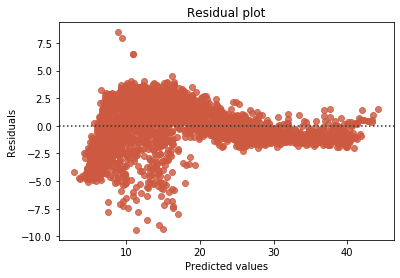

In [193]:
sns.residplot(y_pred.flatten(), y_test.flatten(), color=(0.8, 0.35, 0.25))
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')


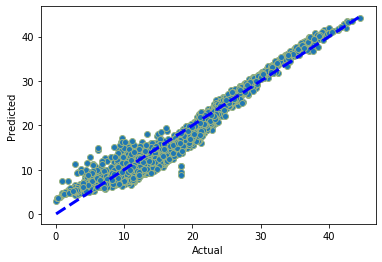

In [194]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0.6,0.7,0.5))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'b--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

Text(0.5, 1.0, 'NN model predictions')

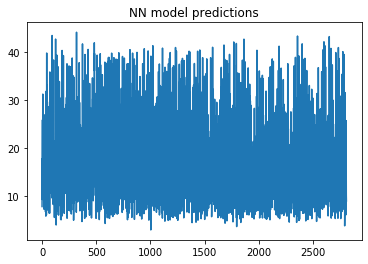

In [195]:
plt.plot(y_pred)
plt.title("NN model predictions")

# Discussions about parameter/network structure choice

In the assignment I have implemented 3 layer neural network.  The Input layer is having 12 nodes because there are 12 features in my data. Output layer has 1 node. 

Moreover I have repeated the process with many layers and figured out that the 3 layer neural network gave the best results.

By changing the number of nodes in hidden layer I tried for the best network structure. By passing my models variable as [[12, 7, 1], [12, 3, 1], [12, 3, 1], [12, 3, 1], [12, 3, 1]] 5 fold cross validation is performed. The first value represents input nodes, the second value represents nodes in hidden layer, third value represents output nodes. 

From the results of cross validation we can see that model [12, 3, 1] has appeared maximum number of times.

The model with number of nodes in hidden layer 3 works better.

# Discussions about Prediction results

In this assignment I have used the regression dataset and have implemented NeuralNet class for regression on the same dataset. On training the model using NeuralNet with optimum structure [12,3,1], model has produced:
RMSE: 0.011548020132669819
R squared value: 0.9999982503897565

According to our problem we can choose the hidden layer and hidden unit. The network tends to act more powerful because each node is connected to a activation function. The function h shown above is used as an activation function. The gradient is updating the weights in each layer during back propagation which made network work so well. 

# Non linear logistic regression

## Data Description 

The US Adult Census dataset has been used in this model to predict the income of an individual based on social factors such as Age, Education, race etc.
The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. Each row is labelled as either having a salary greater than ">50K" or "<=50K".
The goal here is to train a classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.
The dataset is made up of categorical and continuous features. It also contains missing values. The categorical columns are: workclass, education, marital_status, occupation, relationship, race, gender, native_country.
The continuous columns are: age, education_num, capital_gain, capital_loss, hours.

## Data Visualization and Preprocessing

In [113]:
%matplotlib inline
init_notebook_mode(connected=True)

In [114]:
df = pd.read_csv('adult_data.csv', na_values = ' ?')

In [115]:
df.columns =['age', 'workclass',
                    'fnlwgt',
                    'education',
                    'education-num',
                    'marital-status',
                    'occupation',
                    'relationship',
                    'race',
                    'gender',
                    'capital-gain',
                    'capital-loss',
                    'hours',
                    'native-country',
                    'Salary']

In [116]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [117]:
 df.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


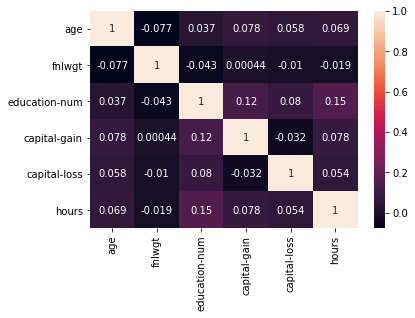

In [118]:
sns.heatmap(df.corr(), annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2530a2e8>,
      dtype=object)

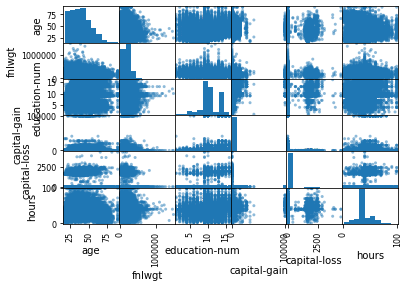

In [119]:
pd.plotting.scatter_matrix(df)

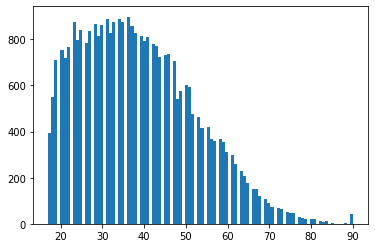

In [120]:
plt.hist(df['age'], bins = 100)
plt.show()

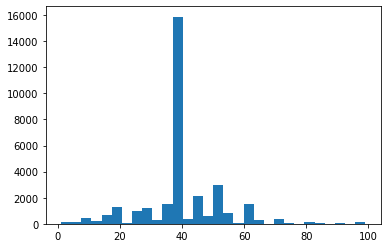

In [121]:
plt.hist(df['hours'], bins = 30)
plt.show()

In [122]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours,native-country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [123]:
for i in df.loc[df['age']==0].index:
    df.loc[i, 'age'] = df['age'].mean()
for i in df.loc[df['fnlwgt']==0].index:
    df.loc[i, 'fnlwgt'] = df['fnlwgt'].mean()
for i in df.loc[df['education-num']==0].index:
    df.loc[i, 'education-num'] = df['education-num'].mean()
for i in df.loc[df['capital-gain']==0].index:
    df.loc[i, 'capital-gain'] = df['capital-gain'].mean()
for i in df.loc[df['capital-loss']==0].index:
    df.loc[i, 'capital-loss'] = df['capital-loss'].mean()
for i in df.loc[df['hours']==0].index:
    df.loc[i, 'hours'] = df['hours'].mean()

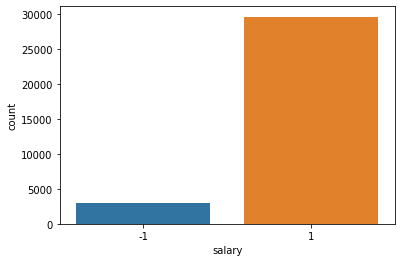

In [124]:
df['salary'] = np.where(df.hours > 20 , 1, -1)

sns.countplot(df['salary'])

In [125]:
df1=df
dropping=['workclass','education','marital-status','occupation','relationship','race','gender','native-country']

In [126]:
df1=df1.drop(columns=dropping)
df1 = df1.replace({' ?': np.nan}).dropna()
df1=df1.dropna()
df1 = df1.reset_index(drop=True)

In [127]:
df1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours,Salary,salary
0,50,83311,13,1077.615172,87.306511,13,<=50K,-1
1,38,215646,9,1077.648268,87.309192,40,<=50K,1
2,53,234721,7,1077.681366,87.311874,40,<=50K,1
3,28,338409,13,1077.714464,87.314556,40,<=50K,1
4,37,284582,14,1077.747563,87.317237,40,<=50K,1


In [128]:
df1 = df1.drop('Salary', axis=1)

In [129]:
df1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours,salary
0,50,83311,13,1077.615172,87.306511,13,-1
1,38,215646,9,1077.648268,87.309192,40,1
2,53,234721,7,1077.681366,87.311874,40,1
3,28,338409,13,1077.714464,87.314556,40,1
4,37,284582,14,1077.747563,87.317237,40,1


In [130]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df1['fnlwgt']=lb.fit_transform(df1['fnlwgt'])
df1.dropna(how='any')   
df1.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours,salary
0,50,2925,13,1077.615172,87.306511,13,-1
1,38,14085,9,1077.648268,87.309192,40,1
2,53,15335,7,1077.681366,87.311874,40,1
3,28,19354,13,1077.714464,87.314556,40,1
4,37,17699,14,1077.747563,87.317237,40,1


In [131]:
y_dataframe=df1['salary']
dataframe_lr=df1.drop(['salary'],axis=1)
from sklearn import model_selection
from sklearn.metrics import r2_score

# Reading and analyzing the plots

Seeing the dataset we can examine that the dataset is giving discrete output hence this dataset is used for classification. Further the data consisted of missing values and string characters which needed preprocessing of data. Additionally feeding the data with feature matrix of a particular person helps to predict the salary.
From the above vizualization we can see that the histogram is skewed more towards the age below 40, which shows that people below the age of 40 can work for more no of hours. Moreover from the above histogram we could also see that the histogram for the work hours is maximum for 40 hours, so people can work maximum for 40 hours. Hence from the above vizualization we can infer the relation with the salary.

## Summary of nonlinear logistic regression

Earlier, we used the linear logistic regression that uses the softmax layer for classification along with a linear model. We add extra layers in non-linear logistic regression which is known as hidden layers. With the inclusion of hidden layer we use the softmax function now in the last layer. Untill then the output is passed by the input layer to hidden layer, then the hidden layer passes to the other hidden layer or softmax function and the softmax function then gives the output. 


 $$
wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
 $$
 
 
<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm \\
Gm & = softmax(Ym)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h \frac{1}{N} \frac{1}{K} Xlm^\top \Big( (Tm -Ym) Wm^\top \odot (1 - Zm^2) \Big) \\
Wm &\leftarrow Wm + \alpha_o \frac{1}{N} \frac{1}{K} Zlm^\top \Big( Tm - Ym \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h Xlm^\top \Big( (Tm - Gm) Wm^\top \odot (1 - Zm^2) \Big)\\
Wm &\leftarrow Wm + \alpha_o Zlm^\top \Big(  Tm - Gm\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>

</tr>
</table> 

In [132]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        expz = np.exp(z) 
        return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

   
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    
    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        
        _lambda = params.pop('Lambda', 0.)

        
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])
       
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

# Explanation of code 

In the above code we have implemented the non linear logistic regression class named as NeuralNetLogReg. The __init__ function is a constructor of the class which calls the NeuralNet class' constructor for assigning values to nLayers i.e the number of layers for the model. The_nLayers is the number of hidden unit layers. rho is the learning rate attribute of the class. _W is the weights. _weights is the weights that is _W written in one dimension. stdX is the standardization class for the data. stdT is the standardization class for the target. <br>

The train function takes input as features and target. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda. Forward pass in neural network propagates same as in the class discussed above the only difference is that and an additional t=self.softmax(t) is added to the last layer. The last layer will be the softmax function which then gives output to the output layer. Activation function is used to make the network nonlinear. In the backward pass the function takes the the z values, Target values and the error as input. Based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particualr layer. Below are the functions that are excecuted during backward pass.

 $$
 W \leftarrow W + \alpha_o Zl^\top \Big(  T - g(X)\Big).
 $$


$$
 V \leftarrow V + \alpha_h Xl^\top \Big( (T - g(X)) W^\top \odot (1 - Z^2) \Big).
$$
 

In [133]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [134]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [135]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [136]:
from sklearn.metrics import roc_curve, auc

# Testing model with Dummy/Toy Data

Text(0.5, 1.0, 'test data set')

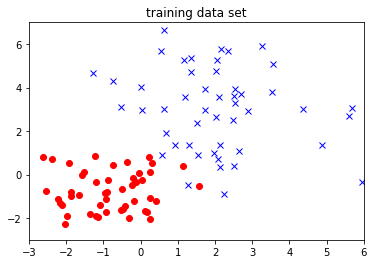

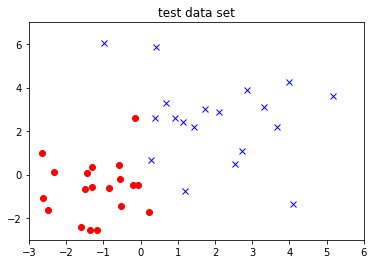

In [137]:
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3


#  Train Data

C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)

Xtrains = (Xtrain - means) / stds


Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1


Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [138]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

/Users/anushkatibrewal/nn.py:113: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in true_divide



In [139]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [140]:
classes

array([[0.4858563 , 0.5141437 ],
       [0.48298749, 0.51701251],
       [0.48843863, 0.51156137],
       [0.4867836 , 0.5132164 ],
       [0.47879572, 0.52120428],
       [0.48463954, 0.51536046],
       [0.49078781, 0.50921219],
       [0.48392104, 0.51607896],
       [0.47963367, 0.52036633],
       [0.47927074, 0.52072926],
       [0.48901509, 0.51098491],
       [0.47757515, 0.52242485],
       [0.4836579 , 0.5163421 ],
       [0.48340711, 0.51659289],
       [0.4874656 , 0.5125344 ],
       [0.48718599, 0.51281401],
       [0.48539937, 0.51460063],
       [0.48758215, 0.51241785],
       [0.48641352, 0.51358648],
       [0.48321114, 0.51678886],
       [0.49029057, 0.50970943],
       [0.49987045, 0.50012955],
       [0.49938449, 0.50061551],
       [0.49387882, 0.50612118],
       [0.50753825, 0.49246175],
       [0.49441563, 0.50558437],
       [0.50654814, 0.49345186],
       [0.48935335, 0.51064665],
       [0.49869282, 0.50130718],
       [0.49470709, 0.50529291],
       [0.

Accuracy:  50.0 %


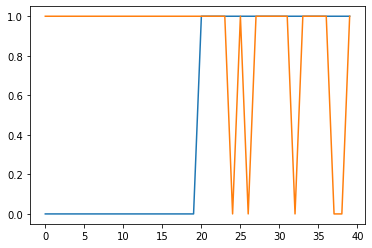

In [196]:
plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

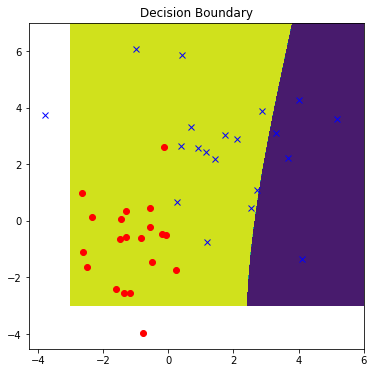

In [142]:
x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

## Discussion about dummy data 

We get 50% accuracy from the code. Hence, we can conclude that our NeuralNetLogReg class is working. 

# Testing on classification dataset

In [201]:
#XTrain, XTest, YTrain, YTest = model_selection.train_test_split(dataframe_lr, y_dataframe,test_size=0.25,random_state=42)

In [207]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

scaler = StandardScaler()


t=df1['salary']
df1_p=df1.drop(['salary'],axis=1)
Xtrain,Xtest,Ytrain,Ytest = model_selection.train_test_split(df1_p,t,test_size=0.25,random_state=42)

In [208]:
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.fit_transform(Xtest)
Ytrain=np.array(Ytrain)
Ytest=np.array(Ytest)

In [209]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [210]:
nn = NeuralNetLogReg([6,4,2])
nn.train(sc.fit_transform(XTrain), T, niter=1000) 
p,l = nn.use(XTest)

/Users/anushkatibrewal/nn.py:113: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in true_divide

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning:

divide by zero encountered in log

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning:

invalid value encountered in multiply



In [211]:
y_test=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test, l))
print('Accuracy:', accuracy_score(y_test, l))

F1 score: 0.6392977964706957
Accuracy: 0.5153562653562653


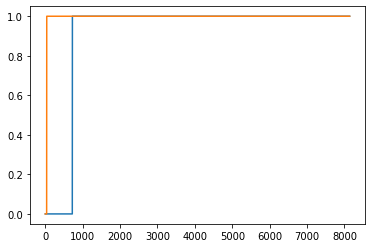

In [205]:
plt.plot(np.sort(y_test))
plt.plot(np.sort(l))

In [212]:
cf3=confusion_matrix(y_test, l)
cf3
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]

In [151]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)

In [152]:
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  0.9875115633672525
Specificity:  0.8879668049792531
Recall:  0.8635566940811649


Text(0.5, 1, 'Confusion Matrix')

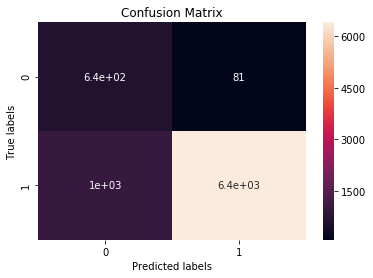

In [153]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

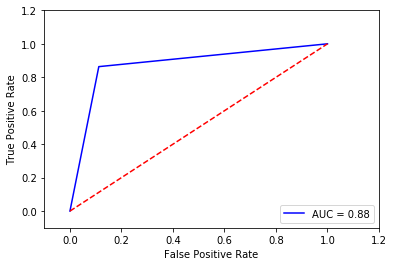

In [154]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, l)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

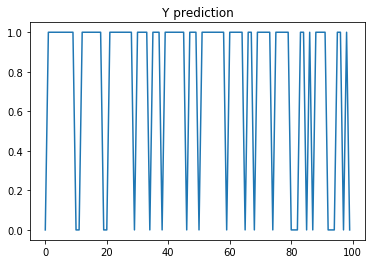

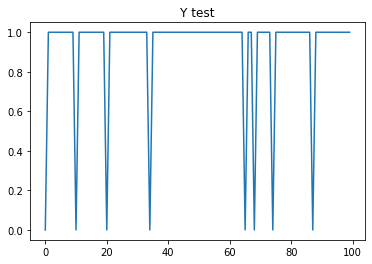

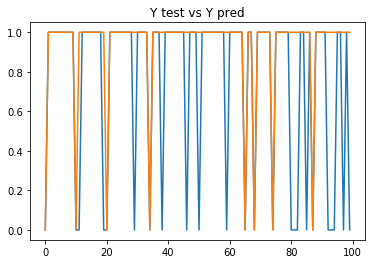

In [155]:
plt.title("Y prediction")
plt.plot(l[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(l[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

# Cross validation code for nonlinear logistic regression 

In [156]:
def split(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split(X)
    partitionedT = split(T)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

## Explanation of the code

In the above code we have used split function which is used to divide the data into different parts. So, the split function will split parts of 20% of whole data, myList will give five 20% of 100% of data. We iterate through the length of (data) and keep on appending to myList so we will have 5 parts now and we will return the list. 


The cross_validate function takes the input parameters as X, T and parameters as input, where X contains the sample, T that contains the target values of the samples. This final_list and best_paramlist is returned by this function. The data divided by the split function is stored into X_partitioned and T_partitioned of this function which are in the form of lists. Each element of these lists are 20% of the original data size. 


In the cross_validate function there is a for loop that iterates through all the 5 parts and test is the test data's index of X_partitioned and T_parititoned lists. The training set uses the remaining data. Now inside for loop using X_paritioned[test], T_partitioned[test] we declare X_test and Y_test.

There is a second for loop that uses k which is the validation part of the 5 parts. Except val and test the rest data is used for our training set. Inside the for loop we declare X_val, y_val using X_partitioned[val] and  T_partitioned[val] which uses another 20% of our data.

We are training data with our different parameters passed and evaluating on validation data in each validation loop . The rmse value returned by each parameter is appended to rmselist, parameters respective to that rmse are appended into paramlist to keep track of indices. Now after each validation we are selecting the parameter that produced minimum rmse value and storing the results into history_rmse and params list.

We pick one best result from history_rmse list. Now the model is applied to test set after retraining the model with the best parameter param in parameters. The parameters are appended to best_paramlist and the test accuracy is appended to final_list. This operation runs for 5 folds and cross validate function returns final_list and best_paramlist which are best Accuracies of each test and best Params of each test. 

In [157]:
T = add_ones(np.array(y_dataframe).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [158]:
models = [[6,5,2], [6,7,2],[6,9,2], [6,12,2]]
bestAccuracy,bestParam = (cross_validate(np.array(dataframe_lr), T, models))

test 0
val 0
val 1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in true_divide

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning:

divide by zero encountered in log

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning:

invalid value encountered in multiply



[0.9548190353904181, 0.9548190353904181, 0.9548190353904181, 0.9547351524879616]
[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
0.9548190353904181
[6, 5, 2]
val 2
[0.950861930078943, 0.950861930078943, 0.950861930078943, 0.950861930078943]
[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
0.950861930078943
[6, 5, 2]
val 3
[0.9533070802861047, 0.9533070802861047, 0.9533070802861047, 0.9533070802861047]
[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
0.9533070802861047
[6, 5, 2]
val 4
[0.9519594431479842, 0.9519594431479842, 0.9519594431479842, 0.9519594431479842]
[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
0.9519594431479842
[6, 5, 2]
history_rmse [0.9548190353904181, 0.950861930078943, 0.9533070802861047, 0.9519594431479842]
params [[6, 5, 2], [6, 5, 2], [6, 5, 2], [6, 5, 2]]
[0.9548190353904181, 0.950861930078943, 0.9533070802861047, 0.9519594431479842]
[[6, 5, 2], [6, 5, 2], [6, 5, 2], [6, 5, 2]]
[6, 5, 2]
test 1
val 0
[0.9536434482204547, 0.9536434482204547, 0.9536434482204547, 0.9537967

# Testing with optimum parameters

In [159]:
print(bestAccuracy)
print(bestParam)

[0.9533070802861047, 0.9548190353904181, 0.950861930078943, 0.9533070802861047, 0.9519594431479842]
[[6, 5, 2], [6, 12, 2], [6, 5, 2], [6, 5, 2], [6, 5, 2]]


In [160]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [161]:
nn = NeuralNetLogReg([6,5,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))

/Users/anushkatibrewal/nn.py:113: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



In [162]:
y_test=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test, l))
print('Accuracy:', accuracy_score(y_test, l))

F1 score: 1.0
Accuracy: 1.0


# Discussions about parameter/network structure choice

A 5 layer neural network has been built in this assignment. Since the dataset consists of 6 input features so we have 6 input nodes. The output layer consists of 2 nodes. 

I have used the dataset with not only 5 layers but also different number of layers and we can find out that my data works best with 5 layers. But for my case, 5 layers seems to be the best fit for my dataset. 

I tried for the best network structure by changing the number of nodes in hidden layer. I performed 5 fold cross validation by passing my models variable as [[6,5,2], [6,7,2],[6,9,2], [6,12,2]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes. 

From the results of cross validation we can see that model [6,5,2] has appeared maximum number of times. The f1 score values returned for [6,5,2] in the final result are 0.9536434482204547, 0.9548190353904181, 0.950861930078943.

The model with number of nodes in hidden layer 5 works better. 

Hence, I've used [6,5,2] as the final structure and I got F1 score: 1.0 and Accuracy: 1.0. 

## Conclusion

In this assignment I have learnt the working of neural network. I gained insights upon how neural network works do powerful for complex problems. I have also learned the implementation of k fold cross validation and also how non linear logistic regression works. I also learned the importance of selecting the parameters. Doing the coding from the scratch without using any libraries was tough, but this helped me increase my skill sets, and now I would say while doing this assignment I gained alot of knowledge.

## References 

1)Ray, Sunil, and Business Analytics. “Improve Your Model Performance Using Cross Validation (in Python / R).” Analytics Vidhya, 4 Sept. 2019, https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/.<br>
2)“Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-ML Methodology.ipynb.<br>
3)“Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-ML Methodology.ipynb.<br>
4)“Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-ML Methodology.ipynb.

# Extra Credit

In [163]:
df=pd.read_excel('AirQualityUCI.xlsx')

In [164]:
df = df.drop('Date', axis=1)
df = df.drop('Time', axis=1)
df = df.drop('C6H6(GT)', axis=1)

In [165]:
df[df < 0] = 0

In [166]:
for i in df.loc[df['CO(GT)']==0].index:
    df.loc[i, 'CO(GT)'] = df['CO(GT)'].mean()
for i in df.loc[df['PT08.S1(CO)']==0].index:
    df.loc[i, 'PT08.S1(CO)'] = df['PT08.S1(CO)'].mean()
for i in df.loc[df['NMHC(GT)']==0].index:
    df.loc[i, 'NMHC(GT)'] = df['NMHC(GT)'].mean()
for i in df.loc[df['PT08.S2(NMHC)']==0].index:
    df.loc[i, 'PT08.S2(NMHC)'] = df['PT08.S2(NMHC)'].mean()
for i in df.loc[df['NOx(GT)']==0].index:
    df.loc[i, 'NOx(GT)'] = df['NOx(GT)'].mean()
for i in df.loc[df['PT08.S3(NOx)']==0].index:
    df.loc[i, 'PT08.S3(NOx)'] = df['PT08.S3(NOx)'].mean()
for i in df.loc[df['NO2(GT)']==0].index:
    df.loc[i, 'NO2(GT)'] = df['NO2(GT)'].mean()
for i in df.loc[df['PT08.S4(NO2)']==0].index:
    df.loc[i, 'PT08.S4(NO2)'] = df['PT08.S4(NO2)'].mean()
for i in df.loc[df['PT08.S5(O3)']==0].index:
    df.loc[i, 'PT08.S5(O3)'] = df['PT08.S5(O3)'].mean()
for i in df.loc[df['T']==0].index:
    df.loc[i, 'T'] = df['T'].mean()
for i in df.loc[df['RH']==0].index:
    df.loc[i, 'RH'] = df['RH'].mean()
for i in df.loc[df['AH']==0].index:
    df.loc[i, 'AH'] = df['AH'].mean()

In [167]:
target = pd.DataFrame(df.iloc[:,9])

In [168]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150.0,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112.0,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88.0,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80.0,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51.0,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [169]:
target.shape

(9357, 1)

# Tan h

In [170]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [171]:
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
   
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
   
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
           
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
           
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

In [172]:
models = [[12,3,1],[12,5,1],[12,7,1], [12,10,1], [12,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(df), np.array(target), models)

Test number:  0
K is :  0
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.44316622632005576, 0.399450721174396, 0.3713826298205061, 0.3858736860047541, 0.4031800228473304]
0.3713826298205061
[12, 7, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.467335262164068, 0.26347033109938084, 0.2825884433627938, 0.20263020379298263, 0.34379897500345324]
0.20263020379298263
[12, 10, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.08155043625609883, 0.13031511675565333, 0.07475106470966555, 0.23197851783236395, 0.15538102408585916]
0.07475106470966555
[12, 7, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.3546207576640444, 0.1819391392523025, 0.18308838305253322, 0.40718309464012653, 0.27020331670426756]
0.1819391392523025
[12, 5, 1]
[[12, 7, 1], [12, 10, 1], [12, 7, 1], [12, 5, 1]]
[0.3713826298205061, 0.20263020379298263, 0.07475106470966555, 0.1819391392523025]
[12, 7, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Test number:  1
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.01060739465197049, 0.014385374172925933, 0.01791702111702054, 0.01459387991934154, 0.012972696032566011]
0.01060739465197049
[12, 3, 1]
K is :  1
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.3653406974730292, 0.18246642085243275, 0.3514757525135202, 0.17461900875575057, 0.32670085727409676]
0.17461900875575057
[12, 10, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.2966909054587245, 0.14547759320210046, 0.22878770193495265, 0.20809530170480733, 0.15218405448706857]
0.14547759320210046
[12, 5, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.4257454482931429, 0.3181430834783276, 0.4336614731980949, 0.3960533423574687, 0.31709793221781196]
0.31709793221781196
[12, 12, 1]
[[12, 3, 1], [12, 10, 1], [12, 5, 1], [12, 12, 1]]
[0.01060739465197049, 0.17461900875575057, 0.14547759320210046, 0.31709793221781196]
[12, 3, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Test number:  2
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.010328565070963367, 0.01967350670512113, 0.018279444222735267, 0.009718142003371998, 0.01132263533784363]
0.009718142003371998
[12, 10, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.6014717953852889, 0.49444287140321636, 0.5044510159757212, 0.454312598890413, 0.44147400097144557]
0.44147400097144557
[12, 12, 1]
K is :  2
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.0909841954632821, 0.07421931956877198, 0.07939772857137922, 0.2227729038197435, 0.1713008949186564]
0.07421931956877198
[12, 5, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.19203039307686415, 0.4324282430587442, 0.3846767015221341, 0.2825214602786948, 0.3647489955118121]
0.19203039307686415
[12, 3, 1]
[[12, 10, 1], [12, 12, 1], [12, 5, 1], [12, 3, 1]]
[0.009718142003371998, 0.44147400097144557, 0.07421931956877198, 0.19203039307686415]
[12, 3, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Test number:  3
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.018913274892989006, 0.01403801020441963, 0.012434584061400262, 0.015530301066898705, 0.015131686284692069]
0.012434584061400262
[12, 7, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.5037910197936086, 0.5310790128093531, 0.511864949181124, 0.5790609095192775, 0.35169112744793546]
0.35169112744793546
[12, 12, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.22432998797327194, 0.2566274768243986, 0.3231952524088421, 0.32488069767882555, 0.21914982517315496]
0.21914982517315496
[12, 12, 1]
K is :  3
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.4553320288596329, 0.18451318248601822, 0.32472763921236025, 0.3781525483263845, 0.3598587787427047]
0.18451318248601822
[12, 5, 1]
[[12, 7, 1], [12, 12, 1], [12, 12, 1], [12, 5, 1]]
[0.012434584061400262, 0.35169112744793546, 0.21914982517315496, 0.18451318248601822]
[12, 3, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Test number:  4
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.010844032731346494, 0.0305862670630444, 0.01789406865248972, 0.012584557778355187, 0.009541923616509688]
0.009541923616509688
[12, 12, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.5784659857345282, 0.7121173952764109, 0.549593124346752, 0.463610384714419, 0.3103727585330794]
0.3103727585330794
[12, 12, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.3576843506159352, 0.13953767101904505, 0.36271305919092245, 0.16931758830612426, 0.33370030073371665]
0.13953767101904505
[12, 5, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.23102595527742606, 0.2954842427241921, 0.1738917841610663, 0.21243729867395525, 0.23630950647348875]
0.1738917841610663
[12, 7, 1]
K is :  4
[[12, 12, 1], [12, 12, 1], [12, 5, 1], [12, 7, 1]]
[0.009541923616509688, 0.3103727585330794, 0.13953767101904505, 0.1738917841610663]
[12, 3, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



In [173]:
from sklearn import model_selection

In [174]:
print(bestAccuracy,bestParam)

[2.477488485502834, 0.5366904408601891, 0.3109265216771352, 0.08582151627575371, 0.2270940090536308] [[12, 7, 1], [12, 3, 1], [12, 3, 1], [12, 3, 1], [12, 3, 1]]


In [175]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(df),np.array(target),test_size=0.30,random_state=40)

In [176]:
model=NeuralNet([12,3,1])  

model.train(X_train,y_train,niter=1000)

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



{'w': array([-5.44180208e-01, -3.29838161e-01,  9.48993210e-01,  4.60174521e-03,
        -3.85250902e-03,  1.79756845e-03,  7.19954161e-03, -6.91101606e-03,
         3.84840387e-03,  1.93847259e-03, -1.65625142e-03,  8.02518005e-04,
        -2.31247775e-02,  1.90607546e-02, -9.25797476e-03,  4.39861538e-04,
        -7.57676092e-04,  9.29209039e-04, -4.06339833e-03,  3.25743942e-03,
        -1.82962785e-03, -4.80295977e-04,  5.68153853e-04, -4.27708072e-04,
         9.10241321e-03, -7.01885992e-03,  3.50899076e-03,  1.32881199e-02,
        -1.02089049e-02,  3.46393810e-03, -3.45749249e-01, -1.68822091e-01,
        -3.36351216e-01, -2.65605854e-02,  1.92596566e-02, -1.38269205e-02,
         4.15593139e-02, -2.57000525e-02,  9.03564457e-03,  1.06796691e-01,
        -1.52111961e+00, -2.02430254e+00, -2.03507925e+00]),
 'f': 1.3576378863995003e-06,
 'reason': 'reached limit of nIterations',
 'wtrace': None,
 'ftrace': None}

In [177]:
y_pred=model.use(X_test)

In [178]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 0.014898635511204636
R squared value: 0.9999969981444333


# Sigmoid 

In [179]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0 
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.Sigma(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (np.exp(-Z[i])/(1+np.exp(-Z[i]))**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [180]:
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
   
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
       
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

In [181]:
models = [[12,3,1],[12,5,1],[12,7,1], [12,10,1], [12,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(df), np.array(target), models)

Test number:  0
K is :  0
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[6.633400181023314, 5.845889775938822, 4.729952299208165, 3.7425312255657337, 4.199748080829018]
3.7425312255657337
[12, 10, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[3.8011218119763837, 3.467339367648842, 3.266660580617781, 2.6540557275318424, 2.2272432612201913]
2.2272432612201913
[12, 12, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[2.033258162453236, 1.5436949847437944, 1.3948845910864556, 1.1343808397690558, 0.9235975846850374]
0.9235975846850374
[12, 12, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[4.502141125381348, 3.237065035616358, 3.0394995408478667, 2.7490708694714985, 1.9259536001407274]
1.9259536001407274
[12, 12, 1]
[[12, 10, 1], [12, 12, 1], [12, 12, 1], [12, 12, 1]]
[3.7425312255657337, 2.2272432612201913, 0.9235975846850374, 1.9259536001407274]
[12, 7, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Test number:  1
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[1.814799202885137, 1.2679388375562757, 0.976473028572529, 1.3169813434301, 0.8138940924697923]
0.8138940924697923
[12, 12, 1]
K is :  1
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[1.4901620746468682, 3.5357348663282084, 3.26260185614562, 2.440246517416418, 2.3929648916942767]
1.4901620746468682
[12, 3, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[2.076746895087066, 1.009699409416123, 1.366278564271501, 1.2339260165161294, 1.3089677187281197]
1.009699409416123
[12, 5, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[3.329778378106808, 3.1476677060213194, 3.008821741613454, 2.069973934412654, 1.8994248112769518]
1.8994248112769518
[12, 12, 1]
[[12, 12, 1], [12, 3, 1], [12, 5, 1], [12, 12, 1]]
[0.8138940924697923, 1.4901620746468682, 1.009699409416123, 1.8994248112769518]
[12, 3, 1]
Test number:  2
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[1.5498685522402322, 1.5783430115085688, 2.983067618340211, 0.8133962140782843, 0.8138652233071627]
0.8133962140782843
[12, 10, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[5.566834828240522, 6.697186800025693, 4.851863779515276, 4.735837959364663, 4.060721242400802]
4.060721242400802
[12, 12, 1]
K is :  2
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[3.5784743388208318, 1.7556795014690052, 1.7228216925328617, 1.3792750981126711, 1.3080360783488807]
1.3080360783488807
[12, 12, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[8.407524634562353, 2.7086606156008477, 2.586411344478129, 3.0539541296080195, 2.190104749207105]
2.190104749207105
[12, 12, 1]
[[12, 10, 1], [12, 12, 1], [12, 12, 1], [12, 12, 1]]
[0.8133962140782843, 4.060721242400802, 1.3080360783488807, 2.190104749207105]
[12, 3, 1]
Test number:  3
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[1.7783533219770615, 0.6498513968707147, 1.1105717945411877, 1.1007885907723038, 0.8309569597572652]
0.6498513968707147
[12, 5, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[7.12154291261828, 5.571626581854592, 5.080382524286861, 4.278181111074626, 4.274107628361486]
4.274107628361486
[12, 12, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[3.741204394473376, 5.5684177920532, 3.223469416478515, 2.884411907597369, 2.2698578102923697]
2.2698578102923697
[12, 12, 1]
K is :  3
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[3.6448609719396834, 3.0079412463841027, 2.218492911138024, 2.3281535194684997, 2.173932633459629]
2.173932633459629
[12, 12, 1]
[[12, 5, 1], [12, 12, 1], [12, 12, 1], [12, 12, 1]]
[0.6498513968707147, 4.274107628361486, 2.2698578102923697, 2.173932633459629]
[12, 3, 1]
Test number:  4
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[1.8166300313835704, 1.3872093705405846, 1.2379190348027818, 0.8183415873385084, 0.8520870064121494]
0.8183415873385084
[12, 10, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[8.780719315070534, 5.744732967336188, 5.0174840887786365, 5.728422102371401, 4.583966195261728]
4.583966195261728
[12, 12, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[7.043015161455489, 2.6141082177208683, 3.179226652862472, 2.4787345403302283, 2.708516739356085]
2.4787345403302283
[12, 10, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[2.1418917462941693, 1.6060483810111483, 1.4838016025525784, 1.3202308975633263, 0.9139719947337686]
0.9139719947337686
[12, 12, 1]
K is :  4
[[12, 10, 1], [12, 12, 1], [12, 10, 1], [12, 12, 1]]
[0.8183415873385084, 4.583966195261728, 2.4787345403302283, 0.9139719947337686]
[12, 3, 1]


In [182]:
from sklearn import model_selection


print(bestAccuracy,bestParam)

[5.242021826472991, 6.941485674761326, 4.581982051744416, 1.8704925554558522, 4.599149936091118] [[12, 7, 1], [12, 3, 1], [12, 3, 1], [12, 3, 1], [12, 3, 1]]


In [183]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(df),np.array(target),test_size=0.30,random_state=40)

In [184]:
model=NeuralNet([12,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



{'w': array([-0.04944748,  0.06710787,  0.15554496, -0.02187797,  0.01366396,
         0.07258698, -0.12425229, -0.05195102,  0.05521533,  0.01456342,
        -0.10266684, -0.09016047, -0.02658911,  0.08949552,  0.19054752,
        -0.03178182,  0.04833937, -0.14557616, -0.09415331,  0.04419681,
        -0.09258667, -0.10944732,  0.10088068, -0.05051009,  0.16853045,
         0.23390229,  0.55307173, -0.0776503 , -0.19541446, -0.15665506,
         0.84896298,  1.33601791,  1.54900781, -0.51702567, -0.71840967,
        -0.86391084,  0.42395242,  0.43221088,  0.77759899, -1.36554688,
         0.63997647,  1.68752254,  0.48288241]),
 'f': 0.04258529900816244,
 'reason': 'reached limit of nIterations',
 'wtrace': None,
 'ftrace': None}

In [185]:
y_pred=model.use(X_test)

from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 2.540790849254762
R squared value: 0.9126959009727577


# ReLU

In [186]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)
    
    def ReLU(self, x):
        return x * (x > 0)

    def dReLU(self, x):
        return 1. * (x > 0)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLU(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1. * Z[i])
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [187]:
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
   
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist

In [188]:
models = [[12,3,1],[12,5,1],[12,7,1], [12,10,1], [12,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(df), np.array(target), models)

Test number:  0
K is :  0
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[2.870258597337199, 0.6910914129422371, 0.6575777367100223, 0.9819579828740727, 0.8242086796794199]
0.6575777367100223
[12, 7, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[2.5572629360568135, 0.4214194068469964, 0.4985102358019462, 0.48250843557661105, 0.7360592673289033]
0.4214194068469964
[12, 5, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.46995949221905825, 0.40815723352632516, 2.9177920301023397, 0.9530321817472353, 0.48067596889104713]
0.40815723352632516
[12, 5, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[1.0596566905742686, 0.8685223434975345, 0.8962474604876535, 0.9747030745919637, 1.027492112055545]
0.8685223434975345
[12, 5, 1]
[[12, 7, 1], [12, 5, 1], [12, 5, 1], [12, 5, 1]]
[0.6575777367100223, 0.4214194068469964, 0.40815723352632516, 0.8685223434975345]
[12, 7, 1]
Test number:  1
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.14540815702213197, 0.36253458707994185, 0.4352596970016804, 0.2059619135587502, 0.254482507687696]
0.14540815702213197
[12, 3, 1]
K is :  1
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[2.994210692052589, 0.4425193204638747, 0.880041866074273, 0.4308300136917713, 0.44307909414054725]
0.4308300136917713
[12, 10, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.17768140172572242, 0.5288466553632064, 2.2423120645226686, 0.49201715947957636, 0.8649751961888092]
0.17768140172572242
[12, 3, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.05243842785742451, 6.7349240549482445, 0.9755543029864343, 1.719273410255193, 1.121046944023633]
0.05243842785742451
[12, 3, 1]
[[12, 3, 1], [12, 10, 1], [12, 3, 1], [12, 3, 1]]
[0.14540815702213197, 0.4308300136917713, 0.17768140172572242, 0.05243842785742451]
[12, 10, 1]
Test number:  2
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.18800715230251658, 0.2342775955626068, 0.27012589043663143, 0.21512687549755652, 0.2987174277934113]
0.18800715230251658
[12, 3, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[2.889900691255868, 1.8387220877207275, 0.644749349299205, 0.38969985259969026, 0.7072309275760805]
0.38969985259969026
[12, 10, 1]
K is :  2
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.4466214644459406, 0.7072848234076615, 0.44386428342611706, 0.3944874588638833, 1.183181670681098]
0.3944874588638833
[12, 10, 1]
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[2.792777312283136, 0.9584149443092542, 2.548642321357875, 0.895604455663, 1.630422841239334]
0.895604455663
[12, 10, 1]
[[12, 3, 1], [12, 10, 1], [12, 10, 1], [12, 10, 1]]
[0.18800715230251658, 0.38969985259969026, 0.3944874588638833, 0.895604455663]
[12, 3, 1]
Test number:  3
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.3251179351947847, 0.1969724665799298, 0.20505024282745524, 0.2070955154140729, 0.33619793300112344]
0.1969724665799298
[12, 5, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.40719368594274263, 2.14290152356196, 0.38972362195854526, 0.5303361705669809, 0.46789690246187116]
0.38972362195854526
[12, 7, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.026387570348999013, 1.0057700842502753, 0.29629486939970917, 0.5346584652676283, 0.5452310175520821]
0.026387570348999013
[12, 3, 1]
K is :  3
K is :  4


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.9339938803686453, 0.9272098089876564, 0.6757983330563206, 1.0582485179953702, 0.9115587358971725]
0.6757983330563206
[12, 7, 1]
[[12, 5, 1], [12, 7, 1], [12, 3, 1], [12, 7, 1]]
[0.1969724665799298, 0.38972362195854526, 0.026387570348999013, 0.6757983330563206]
[12, 7, 1]
Test number:  4
K is :  0


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.17849995143543557, 0.08691916555148052, 0.21189345550034697, 0.31507724705511514, 0.24557937726446438]
0.08691916555148052
[12, 5, 1]
K is :  1


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[0.09058849259261283, 0.49679939791743233, 1.316824635439459, 0.7767428532801783, 0.3863679609465453]
0.09058849259261283
[12, 3, 1]
K is :  2


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[3.0369236395741326, 0.3737928207197863, 0.4433962037233553, 0.38979259650145237, 1.0569637770181175]
0.3737928207197863
[12, 5, 1]
K is :  3


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: Futu

[[12, 3, 1], [12, 5, 1], [12, 7, 1], [12, 10, 1], [12, 12, 1]]
[2.1831682808685207, 0.879091458152464, 0.7934398148970342, 0.6307364531308289, 0.9743365274383751]
0.6307364531308289
[12, 10, 1]
K is :  4
[[12, 5, 1], [12, 3, 1], [12, 5, 1], [12, 10, 1]]
[0.08691916555148052, 0.09058849259261283, 0.3737928207197863, 0.6307364531308289]
[12, 3, 1]


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



In [189]:
from sklearn import model_selection


print(bestAccuracy,bestParam)

[11.544631202002854, 0.5681252896072998, 0.3965852068911382, 2.0624147627856524, 1.031106851091922] [[12, 7, 1], [12, 10, 1], [12, 3, 1], [12, 7, 1], [12, 3, 1]]


In [190]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(df),np.array(target),test_size=0.30,random_state=40)

In [191]:
model=NeuralNet([12,3,1])  

model.train(X_train,y_train,niter=1000)

/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



{'w': array([ 0.05743309,  0.0573738 ,  0.35640711, -0.07356837,  0.11314631,
         0.01728148, -0.13545417,  0.06194377, -0.0708399 , -0.01671493,
         0.09885308, -0.11807328, -0.02251233,  0.07046797, -0.01365015,
         0.04331025, -0.02813966,  0.00710283, -0.01856063, -0.0987536 ,
        -0.07280046,  0.05506859, -0.07461258, -0.0462121 , -0.21543147,
         0.073559  ,  0.05480119,  0.0213748 ,  0.08699017, -0.11459808,
        -0.34926557,  0.11105113,  0.67689128,  0.085429  ,  0.00800493,
        -0.49729807, -0.29327283, -0.07552492,  0.23622117, -0.55896122,
        -0.56486997,  0.27166383,  0.96711966]),
 'f': 0.030296395110433565,
 'reason': 'reached limit of nIterations',
 'wtrace': None,
 'ftrace': None}

In [192]:
y_pred=model.use(X_test)

from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 2.1190682918126846
R squared value: 0.939272317517542


# Conclusion

I have tested various activation functions. I have implemented neural network structure on 3 different activation functions and that are Tanh, Sigmoid and Relu 
RMSE values:  <br> 
tanh: 0.014898635511204636  <br>
Sigmoid: 2.540790849254762 <br> 
ReLU: 2.1190682918126846

# How to start?

* Download [a3.tgz](http://webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/a3.tgz). 
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
